In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train_data.shape, test_data.shape

((8693, 14), (4277, 13))

# Name

In [5]:
name_set_1 = set(train_data['Name'])
name_set_2 = set(test_data['Name'])

len(name_set_2 - name_set_1)

4156

In [6]:
len(set(name_set_2)), len(set(name_set_1))

(4177, 8474)

# Numeric

In [7]:
num_columns = ['CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

CryoSleep
empty val fraction
train 0.02496261359714713
test 0.021744213233574936
test_cat 3



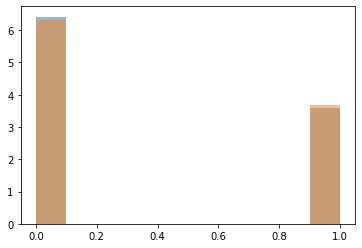

VIP
empty val fraction
train 0.023352122397331185
test 0.021744213233574936
test_cat 3



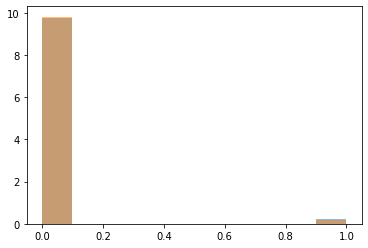

RoomService
empty val fraction
train 0.02082135051190613
test 0.01917231704465747
test_cat 1454



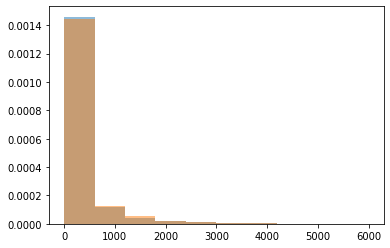

FoodCourt
empty val fraction
train 0.021051420683308408
test 0.024783726911386486
test_cat 1690



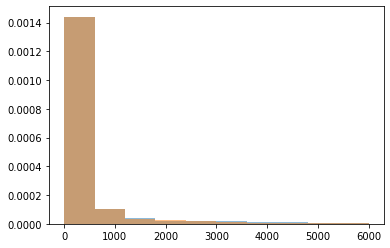

ShoppingMall
empty val fraction
train 0.02392729782583688
test 0.022913256955810146
test_cat 1323



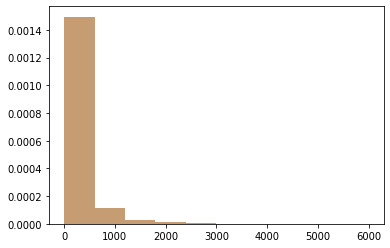

Spa
empty val fraction
train 0.021051420683308408
test 0.023614683189151275
test_cat 1510



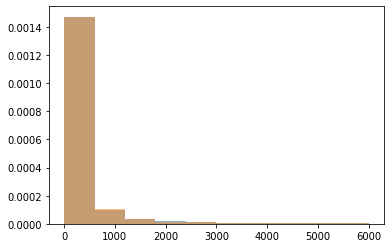

VRDeck
empty val fraction
train 0.021626596111814105
test 0.018704699555763385
test_cat 1494



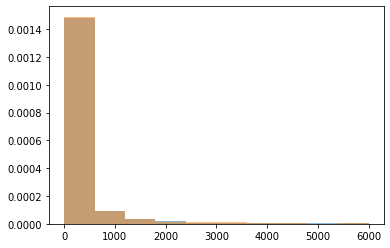

In [8]:
from matplotlib import pyplot as plt
for kc, col in enumerate(num_columns):
    print(col)
    print('empty val fraction')
    print('train', train_data[col].isna().mean())
    print('test', test_data[col].isna().mean())
    
    print('test_cat', len(set(train_data[col])))
    
    print()
    if kc < 2:
        plt.hist(train_data[col].astype('float32'), density=1, alpha=0.5)
        plt.hist(test_data[col].astype('float32'), density=1, alpha=0.5)    
    else:
        plt.hist(train_data[col].astype('float32'), density=1, alpha=0.5, range=(0, 6000))
        plt.hist(test_data[col].astype('float32'), density=1, alpha=0.5, range=(0, 6000))    
    
    plt.show()

In [9]:
x_tr_num = train_data[num_columns]
x_te_num = test_data[num_columns]

In [10]:
x_tr_na = x_tr_num.isna().values
x_tr_num_filled = x_tr_num.fillna(-1).values

x_te_na = x_te_num.isna().values
x_te_num_filled = x_te_num.fillna(-1).values

# Categorical features

In [11]:
cat_columns = ['HomePlanet', 'Destination']

In [12]:
import numpy as np
def ohe(x, w_i_map):
    encoding = np.zeros((len(x), len(w_i_map)))
    for k, v in enumerate(x):
        encoding[k, w_i_map[v]] += 1
    return encoding

In [13]:
x_cat_tr = []
x_cat_te = []

for col in cat_columns:
    print(col)
    print('unique', len(set(train_data[col])), len(set(test_data[col])))
    print('test-train len', len(set(test_data[col]) - set(train_data[col])))
    
    word = set(train_data[col]).union(set(test_data[col]))
    i_w_map = dict(enumerate(word))
    w_i_map = {v: k for k, v in i_w_map.items()}
    print(i_w_map, w_i_map)
    print(set(train_data[col]))
    print()
    
    x_cat_tr.append(ohe(train_data[col], w_i_map))
    x_cat_te.append(ohe(test_data[col], w_i_map))    
    
x_cat_tr = np.concatenate(x_cat_tr, axis=1)
x_cat_te = np.concatenate(x_cat_te, axis=1)

HomePlanet
unique 4 4
test-train len 0
{0: nan, 1: 'Earth', 2: 'Europa', 3: 'Mars'} {nan: 0, 'Earth': 1, 'Europa': 2, 'Mars': 3}
{'Europa', 'Mars', nan, 'Earth'}

Destination
unique 4 4
test-train len 0
{0: 'TRAPPIST-1e', 1: '55 Cancri e', 2: nan, 3: 'PSO J318.5-22'} {'TRAPPIST-1e': 0, '55 Cancri e': 1, nan: 2, 'PSO J318.5-22': 3}
{'TRAPPIST-1e', '55 Cancri e', nan, 'PSO J318.5-22'}



In [14]:
x_cat_tr.shape, x_cat_te.shape

((8693, 8), (4277, 8))

# Text

In [15]:
train_data['Cabin'].isna().mean()

0.02289198205452663

In [16]:
train_data['Cabin'] = train_data['Cabin'].fillna('0/0/0')
test_data['Cabin'] = test_data['Cabin'].fillna('0/0/0')

In [17]:
test_data['Cabin']

0          G/3/S
1          F/4/S
2          C/0/S
3          C/1/S
4          F/5/S
          ...   
4272    G/1496/S
4273       0/0/0
4274     D/296/P
4275     D/297/P
4276    G/1498/S
Name: Cabin, Length: 4277, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer(tokenizer=lambda x: x.split('/'))
cv.fit(train_data['Cabin'].tolist() + train_data['Cabin'].tolist())

C:\Users\Wailt\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(tokenizer=<function <lambda> at 0x00000256B678DD80>)

In [20]:
train_text = cv.transform(train_data['Cabin']).toarray()
test_text = cv.transform(test_data['Cabin']).toarray()

In [21]:
train_text.shape, test_text.shape

((8693, 1827), (4277, 1827))

# hashing trick

In [22]:
from sklearn.feature_extraction import FeatureHasher

hash_tr = []
hash_te = []

nan = '0/0/0'

for col in ['Cabin']:
    print(col)
    all_cat = train_data[col].fillna(nan).tolist() + test_data[col].fillna(nan).tolist()

    tr_cat_ = [{w: 1 for w in i.split('/')} for i in train_data[col].fillna(nan)]
    te_cat_ = [{w: 1 for w in i.split('/')} for i in test_data[col].fillna(nan)]

    fh = FeatureHasher(n_features=10).fit(tr_cat_ + te_cat_)

    hash_tr = (fh.transform(tr_cat_).toarray())
    hash_te = (fh.transform(te_cat_).toarray())

Cabin


# All features

In [24]:
# x_train = np.concatenate([x_tr_na, x_tr_num_filled, x_cat_tr, train_text], axis=1)
# x_test = np.concatenate([x_te_na, x_te_num_filled, x_cat_te, test_text], axis=1)

# x_train = np.concatenate([x_tr_na, x_tr_num_filled, x_cat_tr, hash_tr], axis=1)
# x_test = np.concatenate([x_te_na, x_te_num_filled, x_cat_te, hash_te], axis=1)

# x_train = np.concatenate([x_tr_na, x_tr_num_filled, (x_tr_num_filled + 1) ** 2, 
#                           x_cat_tr, 
#                           hash_tr, hash_tr ** 2], axis=1)
# x_test = np.concatenate([x_te_na, x_te_num_filled, (x_te_num_filled + 1) ** 2, 
#                          x_cat_te, 
#                          hash_te, hash_te ** 2], axis=1)

x_train = np.concatenate([x_tr_na, x_tr_num_filled, (x_tr_num_filled + 1) ** 2, (x_tr_num_filled + 1) ** 0.5, 
                          1 / (x_tr_num_filled + 2),
                          np.log(x_tr_num_filled.astype('float32') + 2),
                          x_cat_tr, 
                          train_text], axis=1)
x_test = np.concatenate([x_te_na, x_te_num_filled, (x_te_num_filled + 1) ** 2, (x_te_num_filled + 1) ** 0.5, 
                         1 / (x_te_num_filled + 2),
                         np.log(x_te_num_filled.astype('float32') + 2),
                         x_cat_te, 
                         test_text], axis=1)

y_train = train_data['Transported']

In [26]:
x_train.shape, x_test.shape, y_train.shape

((8693, 1877), (4277, 1877), (8693,))

In [27]:
x_train

array([[False, False, False, ..., 1, 0, 0],
       [False, False, False, ..., 0, 1, 0],
       [False, False, False, ..., 0, 1, 0],
       ...,
       [False, False, False, ..., 0, 1, 0],
       [False, False, False, ..., 0, 1, 0],
       [False, False, False, ..., 0, 1, 0]], dtype=object)

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

metrics_model = []
all_models = []
for model_name, model in [
#     ('logistic(C=1)', LogisticRegression()), 
#                          ('logistic(C=2)', LogisticRegression(C=2)),
                         ('gb', GradientBoostingClassifier(subsample=0.5, max_features=0.25, n_estimators=150))
#                          ('GaussianNB', GaussianNB())
                         ]:
    print(model_name)
    metrics = []
    for i in range(5):
        print(model_name, i)
        x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, shuffle=1, test_size=0.3)
        
        model.fit(x_tr, y_tr)
        
        y_tr_pred = model.predict(x_tr)
        metric = {}
        metric['train_f1_train'] = f1_score(y_tr, y_tr_pred)
        metric['train_precision'] = precision_score(y_tr, y_tr_pred)
        metric['train_recall'] = recall_score(y_tr, y_tr_pred)
        
        y_val_pred = model.predict(x_val)
        metric['test_f1_train'] = f1_score(y_val, y_val_pred)
        metric['test_precision'] = precision_score(y_val, y_val_pred)
        metric['test_recall'] = recall_score(y_val, y_val_pred)
        
        metrics.append(metric)
        
        all_models.append(model)
    
    model_avg = pd.DataFrame(metrics).mean()
    model_avg['model'] = model_name
    metrics_model.append(model_avg)

gb
gb 0
gb 1
gb 2
gb 3
gb 4


In [32]:
# pd.DataFrame(metrics)

In [33]:
pd.DataFrame(metrics_model)

,train_f1_train,train_precision,train_recall,test_f1_train,test_precision,test_recall,model
0,0.824427,0.800705,0.849611,0.802835,0.773375,0.834771,gb


# Model

In [34]:
model = all_models[0]

y_test_pred = model.predict(x_test)

In [35]:
df = pd.DataFrame(np.array([test_data['PassengerId'], y_test_pred]).T, columns=['PassengerId', 'Transported'])

In [36]:
df.to_csv('sumb_1.csv', index=0)

In [37]:
1045 / 1789

0.5841252096143097

In [38]:
538 / 1789

0.30072666294019007

# ensamble

In [39]:
y_te_pred_proba = []
for model in all_models:
    y_te = model.predict_proba(x_test)
    
    y_te_pred_proba.append(y_te)

In [40]:
np.array(y_te_pred_proba).mean(axis=0)

array([[0.2573494 , 0.7426506 ],
       [0.89725047, 0.10274953],
       [0.02414678, 0.97585322],
       ...,
       [0.09853231, 0.90146769],
       [0.24189136, 0.75810864],
       [0.24541341, 0.75458659]])

$$D(x_1)=\sigma^2$$
$$D(\frac{1}{N}\sum_{j=1}^Nx_j)=\frac{1}{N}\sigma^2$$

In [41]:
y_te_pred = np.array(y_te_pred_proba).mean(axis=0).T[1] > 0.5

In [42]:
df = pd.DataFrame(np.array([test_data['PassengerId'], y_te_pred]).T, columns=['PassengerId', 'Transported'])
df.to_csv('sumb_ens_gb_ht_many.csv', index=0)

# Ens ^ 2

In [52]:
p1 = pd.read_csv('sumb_ens_gb.csv')
p2 = pd.read_csv('sumb_ens_gb_ht.csv')
p3 = pd.read_csv('sumb_ens_gb_ht_2.csv')
p4 = pd.read_csv('sumb_ens_gb_ht_many.csv')
p5 = pd.read_csv('sumb_ens.csv')

In [51]:
ensens_pred = (p1['Transported'].astype('int') + p2['Transported'].astype('int') + p3['Transported'].astype('int') +  p5['Transported'].astype('int') +  p4['Transported'].astype('int')) > 2.5

In [53]:
df = pd.DataFrame(np.array([test_data['PassengerId'], ensens_pred]).T, columns=['PassengerId', 'Transported'])
df.to_csv('ens_5.csv', index=0)

In [54]:
df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
